In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("../DATA/car_plate.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [3]:
def display(img):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,'gray')
    

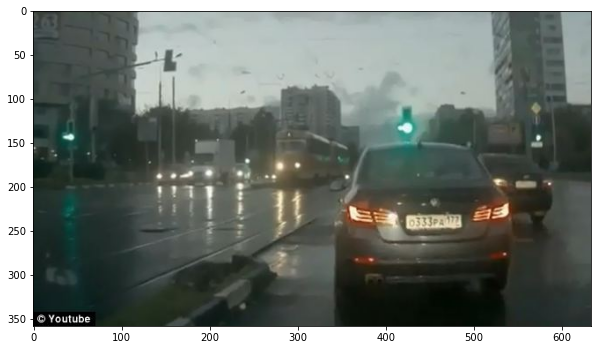

In [4]:
display(img)

In [5]:
car_cascade = cv2.CascadeClassifier("../DATA/haarcascades/haarcascade_russian_plate_number.xml")

In [6]:
def detect_plate(img):
    
    car_plate = img.copy()
    
    car_rect = car_cascade.detectMultiScale(car_plate,scaleFactor=1.2, minNeighbors=5)
    
    for (x,y,w,h) in car_rect: 
        cv2.rectangle(car_plate,(x,y),(x+w,y+h),(255,0,0),3)
  
    return car_plate
    

In [7]:
result = detect_plate(img)

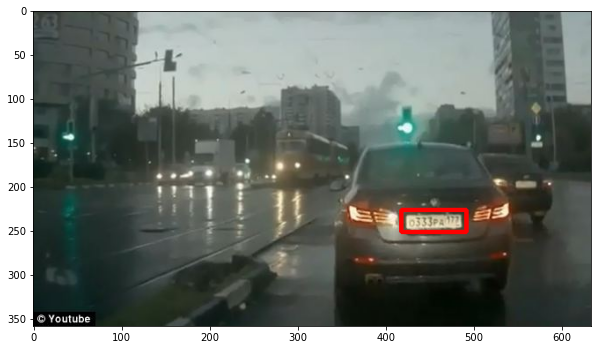

In [9]:
display(result)

In [10]:
def detect_and_blur_plate(img):
    
    car_copy = img.copy()
    roi = img.copy()
    
    car_rect = car_cascade.detectMultiScale(car_copy,scaleFactor=1.2, minNeighbors=5)
    
    for (x,y,w,h) in car_rect:
        
        roi = roi[y:y+h,x:x+w]
        
        blurred_roi = cv2.medianBlur(roi,7)
        
        car_copy[y:y+h,x:x+w] = blurred_roi
        
    return car_copy

In [11]:
result = detect_and_blur_plate(img)

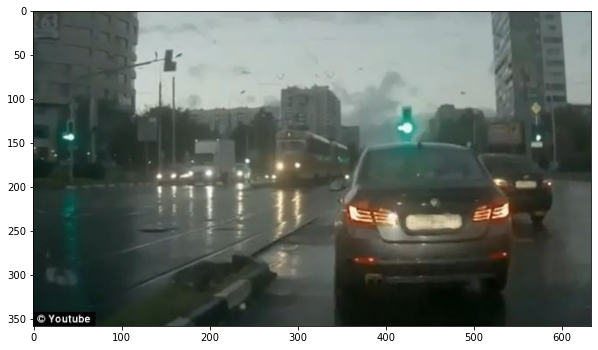

In [12]:
display(result)